In [2]:
import numpy as np
import pandas as pd

import matplotlib as mtl
import matplotlib.pyplot as plt

#helps to visualize
from matplotlib.animation import FuncAnimation

#loading dataset from scikit
from sklearn.datasets import load_boston

# computes the mean square error between the predicted values and the true values
from sklearn.metrics import mean_squared_error 

# this function takes dataset as features and and target and splits the data in two stes : training set and testing set
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

#To display on screen
from IPython.display import HTML 


In [3]:
boston=load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# boston


In [5]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)

In [8]:
features.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [9]:
target=pd.DataFrame(boston.target,columns={'target'})

In [10]:
target.head(10)

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [11]:
max(target['target'])
# if two statements together then write print


50.0

In [12]:
min(target['target'])

5.0

In [13]:
target.describe()

,target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [14]:
df=pd.concat([features,target],axis=1)

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# data visulaization

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation between Target and Attribute

In [17]:
corr=df.corr('pearson')#Read the documentation. Here we are using pearson's correlation

In [18]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [19]:
#We need correlation only between the target value and the other attributes
corr=[abs(corr[attr]['target']) for attr in list(features)]

In [21]:
corr

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [22]:
# MAke a list of pairs [(corr,features)]
l=list(zip(corr,list(features)))
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

In [23]:
# Sort the list of pairs to have a reverse?descending order
# With the correlation value as the key for sorting

l.sort(reverse =True)
l

# l.sort(key=labda x:x[0],reverse =True)

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

In [24]:
# l.reverse()
# l
# l

In [25]:
# unzip it again
corrs,labels=list(zip(*l))
# corrs

In [26]:
corrs

(0.7376627261740143,
 0.6953599470715389,
 0.507786685537561,
 0.483725160028373,
 0.46853593356776646,
 0.4273207723732817,
 0.3883046085868114,
 0.3816262306397776,
 0.3769545650045959,
 0.3604453424505447,
 0.33346081965706653,
 0.24992873408590394,
 0.1752601771902975)

In [27]:
labels

('LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS')

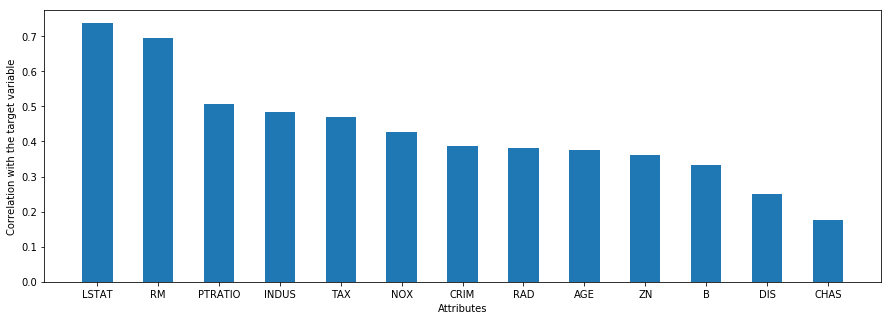

In [28]:
 #PLot the bar graph
plt.figure(figsize=(15,5))
index=np.arange(len(labels))

plt.bar(index,corrs,width=0.5)

plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()# In juypter notebook not required

# Normalization of data

In [29]:
#Normalize tha data to brings all the values to the common scale

X=df['LSTAT'].values
Y=df['target'].values

In [30]:
print(Y[0:10])
print(X[0:10])
# X.describe()

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1 ]


In [31]:
#MinMaxScaler. For each value in a feature, MinMaxScaler
#subtracts the minimum value in the feature and then divides
#by the range. The range is the difference between the original
#maximum and original minimum.
#MinMaxScaler preserves the shape of the original distribution.
x_scaler=MinMaxScaler()
# -1 in reshape means that we want numpy to figure out the dimension
X=x_scaler.fit_transform(X.reshape(-1,1)) # this function expects the vertical values so reshape
X=X[:,-1]  # means default(0) to figure-out
# or X=X[1:,-1]
# x[start:end:step]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1)) # CAlculate and then transform
Y=Y[:,-1]

In [32]:
X[:4]

array([0.08967991, 0.2044702 , 0.06346578, 0.03338852])

In [33]:
Y[:4]

array([0.42222222, 0.36888889, 0.66      , 0.63111111])

In [34]:
# we will use MSE bexause it makes it easier to calculate the gradients
#Gradient -> slope

# Data Splitting

In [35]:
len(X)

506

In [36]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2)

In [37]:
len(Xtrain) #It is 80% of the total length

404

In [38]:
Xtrain[:5]

array([0.44315673, 0.26710817, 0.28421634, 0.26186534, 0.35651214])

# Linear Regression

In [36]:
# There are three functions in Gradient descent:
# 1) Update function
# 2) Error functio
# 3) Gradient Descent functin

In [39]:
def update(m,x,c ,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)
    grad_c=sum(2*((m*x+c)-t))
    m= m-grad_m*learning_rate
    c= c-grad_c*learning_rate
    return m,c
    
    

In [40]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)
    

In [41]:
def gradient_descent(int_m,int_c,x,t,learning_rate,iterations,error_threshold):
    m=int_m
    c=int_c
    error_values=list()
    mc_values=list()
    for i in range(iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print("Error less than the threshold. Stopping Gradient Descent ")
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values
        

In [47]:
%%time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001


m,c,error_values,mc_values =gradient_descent(init_m, init_c, Xtrain, Ytrain, learning_rate, iterations, error_threshold)

CPU times: user 51.8 ms, sys: 12.1 ms, total: 63.9 ms
Wall time: 61.2 ms


# Prediction

In [48]:
#calculate the predictions on the test set as a vectorizes operation
predicted=(m * Xtest)+c


In [49]:
#Compute MSE for the predicted values on the testing set
mean_squared_error(Ytest,predicted)

0.01969534859838515

In [50]:
# Put xtest , ytest and predicted values into a single DataFrame so that we
# can see the predicted values alongside the testing set

p=pd.DataFrame(list(zip(Xtest,Ytest,predicted)) ,columns=['x','target_y','predicted'])

In [51]:
p.head()

,x,target_y,predicted
0,0.320640,0.335556,0.370763
1,0.593543,0.197778,0.160332
2,0.213576,0.444444,0.453318
3,0.338024,0.475556,0.357358
4,0.428808,0.371111,0.287357


# Plot predicted values against the target values

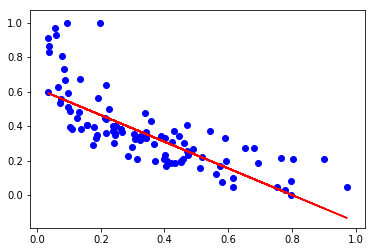

In [52]:
plt.scatter(Xtest,Ytest,color='b')
plt.plot(Xtest,predicted,color='r')

# Revert normalization to obtain the predicted price of the houses in $1000s

In [54]:
# Reshape to change the shape that is required by the scaler
predicted= np.array(predicted).reshape(-1,1)
Xtest=Xtest.reshape(-1,1)
Ytest=Ytest.reshape(-1,1)

Xtest_scaled=x_scaler.inverse_transform(Xtest)
Ytest_scaled=y_scaler.inverse_transform(Ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

#This is to remove the extra dimensions
Xtest_scaled= Xtest_scaled[:,-1]
Ytest_scaled= Ytest_scaled[:,-1]
predicted_scaled= predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(Xtest_scaled,Ytest_scaled,predicted_scaled)), columns=['x','target_y','predicted'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted
0,13.35,20.1,21.68
1,23.24,13.9,12.21
2,9.47,25.0,25.40
3,13.98,26.4,21.08
4,17.27,21.7,17.93
